In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
#from random import randint
import math
import heapq

In [2]:
A = nx.to_numpy_matrix(G, dtype=np.bool)
#fig = plt.figure(figsize=(5, 5))
#plt.imshow(A,cmap="Greys",interpolation="none")   
sns.heatmap(A, cmap = "Blues")

NameError: name 'G' is not defined

In [ ]:
np.all(A.T==A)

In [4]:
np.average(np.sum(A,1))

NameError: name 'A' is not defined

In [30]:
A=nx.adjacency_matrix(G)

This is where it starts

In [3]:
clear all

In [4]:
def avalanche(x,A,f,N):

    count = 0
    degree = np.array(np.sum(A,0))[0]
    degree = np.reshape(degree, (N,1))
    xc = np.reshape(degree + (degree==0), (N,1))
    spikes = np.multiply(x>=xc, 1)
    ava = spikes.copy()
    while np.sum(np.multiply(degree,spikes))> 0:
        ava = np.multiply((ava+spikes)>0,1)
        spikes = np.multiply(x>=degree, 1)
        spikes = np.reshape(spikes,(N,1))
        x = x + A*spikes
        x = x - np.multiply(spikes,degree)
        x = x - (np.random.rand(N,1)>f)
        x = np.multiply(x,(x>0))
        count = count + 1

    return [x,ava]

In [122]:
def my_kmax(R,k):
    N = len(R)
    f = list(R.flat)
    print(f)
    indices = np.array(heapq.nlargest(k, range(len(f)), f.__getitem__))
    j = np.mod(indices,N)
    i = np.floor(indices/N).astype(int)
    #print(indices)
    return [i,j]

In [31]:
R = np.random.randint(N, size = (N,N))


In [105]:
#R[1:5,0] = 0
print(R.shape)
R

(10, 10)


matrix([[ 0,  0,  0,  0,  4,  5,  6,  0,  0,  0],
        [ 0,  0, 12,  0,  0,  0, 16,  0,  0,  0],
        [ 0, 21,  0,  0,  0,  0, 26,  0,  0,  0],
        [ 0,  0,  0,  0,  0, 35, 36, 37, 38, 39],
        [40,  0,  0,  0,  0, 45,  0, 47, 48,  0],
        [50,  0,  0, 53, 54,  0, 56,  0, 58, 59],
        [60, 61, 62, 63,  0, 65,  0, 67,  0, 69],
        [ 0,  0,  0, 73, 74,  0, 76,  0, 78, 79],
        [ 0,  0,  0, 83, 84, 85,  0, 87,  0, 89],
        [ 0,  0,  0, 93,  0, 95, 96, 97, 98,  0]])

In [113]:
R = np.multiply(R,A)

In [144]:
I,J=my_kmax(R,4)
print(I,J)

[0 6 0 0] [6 0 0 1]


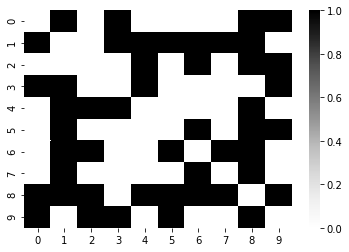

a: 10
[(9, 8), (9, 5), (9, 3), (9, 2), (9, 0), (8, 7), (8, 6), (8, 5), (8, 4), (8, 2)]
Egde number: 15.0


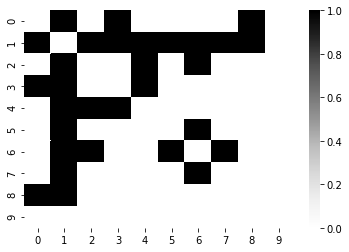

a: 10
[(8, 0), (7, 6), (6, 5), (6, 2), (4, 3), (4, 2), (3, 0), (8, 1), (3, 1), (1, 0)]
Egde number: 10.0


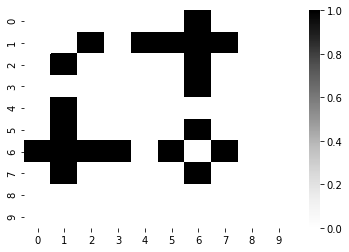

a: 7
[(7, 6), (7, 1), (5, 1), (4, 1), (2, 1), (6, 5), (6, 3)]
Egde number: 6.0


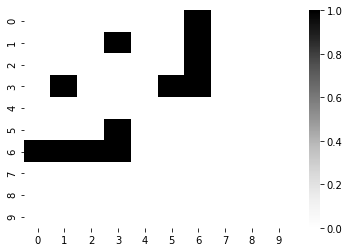

In [169]:
N = 10
f = 0.1 #f leak (fraction of leak)
f = 1-f
mean_degree = 5

K = 4
steps = 3
#tic
G = nx.erdos_renyi_graph(N,mean_degree/N)


A = nx.to_numpy_matrix(G, dtype=np.int)
fig = plt.figure(figsize=(5, 5))
plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
%matplotlib inline
sns.heatmap(A, cmap="Greys")
plt.show()
plt.close("all")
storex = np.zeros((N,steps))
storex_noava = np.zeros((N,steps))

temp = np.arange(0,N**2)
R = temp.reshape(N,N)
#R = np.multiply(R,A)
A_ini = A.copy()

#Initial State
x=np.zeros((N,1));
for i in range(N):
    if degree[i]>0:
        x[i]=np.random.randint(0,degree[i])
    else:
        x[i]=0
        
xb = x

count = 0
xsave = [0]*steps
for i in range(steps):
    #if np.mod(i,steps/100) == 0:
        #print(np.count_nonzero(A))
        
        
    #Particle addition
    
    add_site = np.random.randint(0,N-1)

    x[add_site] = x[add_site] + 1

    #Avalanche processing
    degree = np.array(np.sum(A,0))[0]
    degree = np.reshape(degree, (N,1))
    xc = np.reshape(degree + (degree==0), (N,1))
    spikes = np.multiply(x>=xc, 1)
    ava = spikes.copy()
    temp1 = np.zeros((N,1))
    if np.sum(np.multiply(degree,spikes))>0: 
        [x,temp1] = avalanche(x,A,f,N)
        count = count + 1
    ava = np.multiply((ava+temp1)>0,1)
    xsave[i] = x
    a = np.sum(ava)
    
    
    
    ##Rewiring
    
    R = np.multiply(R,A)
    Ruse = R.copy()
    
    for c1 in range(N):
        for c2 in range(N):
            if Ruse[c1,c2] <= Ruse[c2,c1]:
                Ruse[c1,c2] = -1
            else:
                Ruse[c2,c1] = -1


    #B = Ruse.flatten()
    #B = np.transpose(B)

    #indices = np.argpartition(B.transpose()[0], -a)[-a:]
    #v = indices.copy() # maxk function
    #je = np.mod(v,N)
    #ie = np.floor(v/N)

    ie,je = my_kmax(Ruse,a)
    print('a:',a)
    print(list(zip(ie,je)))
    for j in range(a):
        if (je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0):
            A[int(ie[j]),int(je[j])] = 0
            A[int(je[j]),int(ie[j])] = 0
            
            A[add_site,je[j]] = 1
            A[je[j],add_site] = 1
            
            R[add_site,je[j]] = 0
            R[je[j],add_site] = 0
            
            R = np.multiply((R+1),A)
    print('Egde number:',np.sum(np.sum(A))/2)
    plot_A(A)
        
        
        

In [155]:
a

6

In [157]:
list(zip(ie,je))

[(9, 6), (9, 5), (9, 2), (8, 7), (8, 5), (8, 1)]

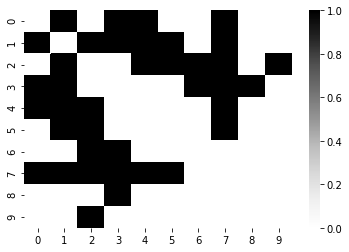

In [158]:
fig = plt.figure(figsize=(5, 5))
plt.title("Adjacency Matrix")
#plt.imshow(A,cmap="Greys",interpolation="none")   
%matplotlib inline
sns.heatmap(A, cmap="Greys")
plt.show()
plt.close("all")

In [163]:
def plot_A(A):
    fig = plt.figure(figsize=(5, 5))
    plt.title("Adjacency Matrix")
    #plt.imshow(A,cmap="Greys",interpolation="none")   
    %matplotlib inline
    sns.heatmap(A, cmap="Greys")
    plt.show()
    plt.close("all")

In [160]:
add_site

2

In [471]:
plt.close("all")

/home/kabir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/kabir/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


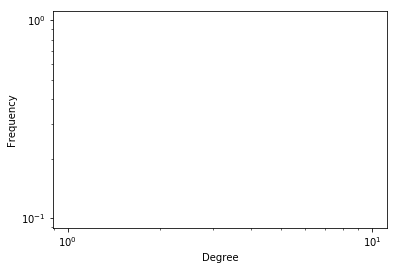

In [141]:
#PLOTTING DEG DIST
degree = np.array(np.sum(A,0))[0]
degree = list(ele.item(0) for ele in degree)
temp = np.bincount(degree)
x_axis = np.arange(0,max(degree)+1)
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.loglog(np.log(x_axis),np.log(temp))


In [406]:
(je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0)

In [491]:
B = Ruse.flatten()

In [503]:
indices = np.argpartition(B.transpose()[0], -(a-1))[-(a-1):]

ValueError: kth(=-8) out of bounds (1)

In [507]:
indices = np.argpartition(B.transpose(), -a)[-a:]

ValueError: kth(=-9) out of bounds (1)

In [505]:
B.transpose().shape

(100, 1)

In [498]:
indices.shape

(1, 100)

In [316]:
# rewiring 
R = np.multiply(R,A)
Ruse = R
for c1 in range(N):
    for c2 in range(N):
        if Ruse[c1,c2] <= Ruse[c2,c1]:
            Ruse[c1,c2] = -1
        else:
            Ruse[c2,c1] = -1
            
            
B = np.array(np.ndarray.flatten(Ruse))
B = np.transpose(B)

indices = np.argpartition(B.transpose()[0], -a)[-a:] # maxk function


v = indices
ie = np.floor((v-1)/N) 
je = np.fmod(v,N) - 1
for vv in range(a):
    if v[vv] == 0:
        je[vv] = 0

for j in range(a):
    if (je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0):
        A[int(ie[j]),int(je[j])] = 0
        A[int(je[j]),int(ie[j])] = 0
        
        A[add_site,je[j]] = 1
        A[je[j],add_site] = 1
        
        R = np.multiply((R+1),A)
    

In [321]:
for j in range(a):
    if (je[j] != add_site) & (A[int(ie[j]),int(je[j])]) != 0 & (A[add_site,je[j]] == 0):
        A[int(ie[j]),int(je[j])] = 0
        A[int(je[j]),int(ie[j])] = 0
        
        A[add_site,je[j]] = 1
        A[je[j],add_site] = 1
        
        R = np.multiply((R+1),A)
    

In [317]:
j = 
(je[j] != add_site) & (A[int(ie[j]-1),int(je[j]-1)]) != 0 & (A[add_site,je[j]] == 0)

False

In [310]:
(je[j] != add_site)

True

In [315]:
a = 10

In [322]:
R

matrix([[  0,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
           1,   0,   0,   0,   0,   0,   0],
        [  2,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   1],
        [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   1,   0,   1,   0,   0,   0,   1,   0,   1,
           0,   0,   0,   1,   0,   0,   0],
        [  0,   0,   0,  85,   0,   1,   0,   0,   1,   0,   0,   1,   0,
           0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 106,   0,   1,   0,   0,   0,   0,   0,   0,
           1,   1,   0,   0,   0,   0,   0],
        [122,   0,   0, 125,   0, 127,   0,   1,   0,   1,   0,   0,   1,
           0,   0,   0,   0,   0,   0,   1],
        [  0, 143, 144,   0,   0,   0, 148,   0,   0,   0,   0,   0,   0,
           0,   0,   1,   0,   0,   0,   0],
        [  0,   1,   0,   0, 166,   0,   0,   0,

In [289]:
je = np.fmod(v,N) - 1
for vv in range(a):
    if v[vv] == 0:
        je[vv] = 0
    else:    
        je[vv] = je[vv] + N

In [303]:
je = np.fmod(v,N) - 1

In [306]:
je

array([ 7,  8, 16])

In [286]:
vv=0
v[vv] == -1

False

In [195]:
je = je + np.multiply(N,np.multiply(je==0,1))

In [129]:
y = np.array([1,2,10, 110 ,1,1,1,2,3,4,5,6])
n = 1
print(np.argsort(y)[-n:])
y[np.argsort(y)[-n:]]

[3]


array([110])

In [122]:
ind = np.argpartition(y, -n)[-n:]

In [125]:
ind

array([ 9, 10, 11,  2,  3])

In [127]:
a

1

In [34]:
a = np.sum(ava)i

SyntaxError: invalid syntax (<ipython-input-34-e26a7d5cbfb8>, line 1)

array([[[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 2., 2., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 0.]]])

In [474]:
%matplotlib
plt.plot(np.reshape(xsave, (10000, 20))[-200:,:], linewidth = 10)

Using matplotlib backend: Qt5Agg


ValueError: cannot reshape array of size 5000 into shape (10000,20)

In [59]:
degree

array([[3],
       [2],
       [1],
       [5],
       [4],
       [4],
       [7],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [3],
       [2],
       [2],
       [1],
       [6]])

In [89]:
#Initial State
x=np.zeros((N,1));
for i in range(N):
    if degree[i]>0:
        x[i]=np.random.randint(0,degree[i])
    else:
        x[i]=0
        
##Particle addition
xb = x
add_site = np.random.randint(0,N-1)
x[add_site] = x[add_site] + 1
print(x.shape)
        
count = 1
degree = np.array(np.sum(A,0))[0]
x_critical = degree + (degree==0)
spikes = (x>=x_critical)
ava = spikes

(10, 1)


In [59]:
#Avalanche processing
degree = np.array(np.sum(A,0))[0]
spikes = np.zeros((N,1))
xc = degree + (degree==0)
spikes[np.where(x>=xc)[0]] = 1
ava = spikes
temp1 = np.zeros((N,1))

(10, 1)

In [ ]:
if np.sum(np.multiply(degree,spikes)) > 0: 
    count = 0
    degree = np.array(np.sum(A,0))[0]
    x_critical = degree + (degree==0)
    spikes = (x>=x_critical)
    ava = spikes
    while np.sum(np.multiply(degree,spikes))>0:
        ava = np.multiply(((ava + spikes)>0),1)
        spikes = np.multiply((x>=degree),1)
        spikes = np.reshape(spikes.transpose(), (10,1))

        x = x + A*spikes
        x = x - np.multiply(spikes,degree)
        x = x - (np.random.rand(N,1)>f)
        x = np.multiply(x,(x>0))
    #storextemp(:,count)=x;
        count = count+1
        #count = count + 1

#ava=(ava+temp1)>0;
#a=sum(ava);

In [62]:
x

array([[2.],
       [1.],
       [4.],
       [2.],
       [0.],
       [1.],
       [3.],
       [2.],
       [0.],
       [4.]])

In [91]:
count = 0
degree = np.array(np.sum(A,0))[0]
degree = np.reshape(degree, (N,1))
xc = np.reshape(degree + (degree==0), (N,1))
spikes = np.multiply(x>=xc, 1)
ava = spikes
while np.sum(np.multiply(degree,spikes))> 0:
    ava = np.multiply((ava+spikes)>0,1)
    spikes = np.multiply(x>=degree, 1)
    spikes = np.reshape(spikes,(N,1))
    x = x + A*spikes
    x = x - np.multiply(spikes,degree)
    x = x - (np.random.rand(N,1)>f)
    x = np.multiply(x,(x>0))
    count = count + 1

In [94]:
spikes[1] = 1

In [92]:
count

0

In [88]:
np.sum(np.multiply(degree,spikes))

0

In [72]:
x

array([[2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [6.],
       [1.],
       [2.],
       [0.],
       [1.]])

10

In [361]:
spikes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [93]:
x

array([1, 2])

In [97]:
a=np.array([[10,0],[1,10]])
np.dot(a,np.array([5,0]))

array([50,  5])